In [51]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os
import random
import time
import math
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
import unicodedata
import string
import unicodedata
import string

In [74]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        # Put the declaration of RNN network here
        self.hidden_size = hidden_size
        
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        # Put the computation for forward pass here
        print("HERE!!!!")
        print(input.shape)
        print(hidden.shape)
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)

        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [75]:
import scipy.sparse
import numpy as np
import pandas as pd
X = scipy.sparse.load_npz('../new_data/X_sparse.npz')
Y = np.genfromtxt('../new_data/Y.csv', delimiter = ',')
Y = Y[1:]

In [54]:
#from StringIO import StringIO
#Features = np.genfromtxt('../new_data/features.csv', delimiter = ',')
#Features = Features[1:]
Features_df = pd.read_csv('../new_data/features.csv', quotechar='"', delimiter = ',')

In [55]:
Features = Features_df.values
Features = [l[0] for l in Features]

In [56]:
Features

['aa',
 'aaah',
 'aah',
 'aaron',
 'ab',
 'abandon',
 'abby',
 'abc',
 'ability',
 'abit',
 'able',
 'abs',
 'absolute',
 'absolutely',
 'abt',
 'abuse',
 'ac',
 'accent',
 'accept',
 'access',
 'accident',
 'accidentally',
 'accomplish',
 'accord',
 'account',
 'acct',
 'ace',
 'ache',
 'ack',
 'acoustic',
 'across',
 'act',
 'action',
 'active',
 'activity',
 'actor',
 'actress',
 'actual',
 'actually',
 'ad',
 'ada',
 'adam',
 'adams',
 'add',
 'addict',
 'addiction',
 'addictive',
 'address',
 'adjust',
 'admin',
 'admire',
 'admit',
 'adobe',
 'adopt',
 'adorable',
 'adore',
 'ads',
 'adult',
 'advance',
 'advantage',
 'adventure',
 'advert',
 'advertise',
 'advice',
 'affect',
 'afford',
 'afraid',
 'africa',
 'afternoon',
 'afterwards',
 'age',
 'agenda',
 'agent',
 'agh',
 'ago',
 'agree',
 'ah',
 'aha',
 'ahah',
 'ahaha',
 'ahahaha',
 'ahead',
 'ahh',
 'ahhh',
 'ahhhh',
 'ahhhhh',
 'ahhhhhh',
 'ai',
 'aid',
 'aim',
 'aint',
 'air',
 'airport',
 'aj',
 'aka',
 'ako',
 'aku',
 '

In [57]:
n_features = len(Features)
n_features

5000

In [58]:
from collections import defaultdict

all_categories = set()
category_lines = defaultdict(lambda: list())
cnt = 0
for category in Y:
    all_categories.add(category)
    category_lines[category].append(X[cnt])
    cnt += 1

In [59]:
all_categories = list(all_categories)
all_categories

[0.0, 1.0]

In [60]:
category_lines

defaultdict(<function __main__.<lambda>()>,
            {1.0: [<1x5000 sparse matrix of type '<class 'numpy.int64'>'
              	with 3 stored elements in Compressed Sparse Row format>,
              <1x5000 sparse matrix of type '<class 'numpy.int64'>'
              	with 5 stored elements in Compressed Sparse Row format>,
              <1x5000 sparse matrix of type '<class 'numpy.int64'>'
              	with 8 stored elements in Compressed Sparse Row format>,
              <1x5000 sparse matrix of type '<class 'numpy.int64'>'
              	with 7 stored elements in Compressed Sparse Row format>,
              <1x5000 sparse matrix of type '<class 'numpy.int64'>'
              	with 4 stored elements in Compressed Sparse Row format>,
              <1x5000 sparse matrix of type '<class 'numpy.int64'>'
              	with 9 stored elements in Compressed Sparse Row format>,
              <1x5000 sparse matrix of type '<class 'numpy.int64'>'
              	with 10 stored elements in C

In [61]:
type(category_lines[1][0])

scipy.sparse.csr.csr_matrix

In [62]:
def featureToIndex(feature):
    return Features.find(feature)

In [63]:
def featureToIndex(feature):
    return Features.index(feature);

In [64]:
def featureToTensor(feature):
    tensor = torch.zeros(1, n_features)
    tensor[0][featureToIndex(feature)] = 1
    return tensor

In [65]:
def sparseToList(x_sparse):
    return x_sparse.toarray()[0]

x_nparray = sparseToList(category_lines[1][0])
print(x_nparray)

[0 0 0 ... 0 0 0]


In [81]:
# x_length * 1 * n_features
'''
def x_ToTensor(x):
    print("x:")
    print(x)
    #line_length = x.todense().shape[1]
    x_list = sparseToList(x) #line
    print("x_list:")
    #print(x_list)
    print(x_list[15:40])
    tensor = torch.tensor(x_list)
    print("tensor:")
    print(tensor)
    return tensor
'''

def x_ToTensor(x):
    x_tensor = x.todense()
    #print(x_tensor)
    #print(x_tensor.shape)
    binary_x_tensor = torch.zeros(1, n_features)
    #print(binary_x_tensor.shape)
    #print(binary_x_tensor)
    x_list = sparseToList(x)
    print(x_list)
    print(len(x_list))
    x_line_length = 0
    for i, cnt in enumerate(x_list):
        if cnt > 0:
            binary_x_tensor[0][i] = 1
            x_line_length += 1
            print("i:",i,binary_x_tensor[0][i-2:i+2])
    print(binary_x_tensor)
    print("x_line_length:",x_line_length)
    tensor = torch.zeros(x_line_length, 1, n_features)
    feature_index = 0
    one_cnt = 0
    print("second loop!!!!!!")
    binary_x_tensor_list = binary_x_tensor.tolist()
    for i, b in enumerate(binary_x_tensor_list[0]):
        #print("i:",i,"b:",b)
        #print("feature_index:",feature_index)
        if feature_index == x_line_length:
            break
        if b>0:
            tensor[feature_index][0][i] = 1
            print(tensor[feature_index][0][i-2:i+3])
            one_cnt+=1
            feature_index += 1
    print(one_cnt)
    return tensor
    
x_tensor = x_ToTensor(category_lines[0][0])
print(x_tensor)


[0 0 0 ... 0 0 0]
5000
i: 1946 tensor([0., 0., 1., 0.])
i: 2592 tensor([0., 0., 1., 0.])
i: 3637 tensor([0., 0., 1., 0.])
tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
x_line_length: 3
second loop!!!!!!
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
3
tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])


In [67]:
print(x_tensor)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])


In [76]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = x_ToTensor(line)
    return category, line, category_tensor, line_tensor
'''
category, line, category_tensor, line_tensor = randomTrainingExample()
print(category)
print(line)
print(category_tensor)
print(line_tensor)
cnt = 0
for i in line_tensor:
    if i==1:
        cnt+=1
print((True if 1 in line_tensor else False))
print(cnt)'''

'\ncategory, line, category_tensor, line_tensor = randomTrainingExample()\nprint(category)\nprint(line)\nprint(category_tensor)\nprint(line_tensor)\ncnt = 0\nfor i in line_tensor:\n    if i==1:\n        cnt+=1\nprint((True if 1 in line_tensor else False))\nprint(cnt)'

In [69]:
def train_iteration_CharRNN(rnn, learning_rate, category_tensor, line_tensor):
    criterion = nn.NLLLoss()
    hidden = rnn.initHidden()
    rnn.zero_grad()
    
    print("actual dimension!!!!")
    print(line_tensor)
    
    print(line_tensor.size())
    print(line_tensor.size()[0])
    for i in range(line_tensor.size()[0]):
        #print("input !!!!!!")
        #print(line_tensor[i])
        #print(line_tensor[i].shape)
        output, hidden = rnn(line_tensor[i], hidden)
    
    loss = criterion(output, category_tensor)
    loss.backward()
    
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

def train_charRNN(rnn, n_iters, learning_rate, losses):
    print_every = 1000
    current_loss = 0
    
    def timeSince(since):
        now = time.time()
        s = now - since
        m = math.floor(s / 60)
        s -= m * 60
        return '%dm %ds' % (m, s)

    start = time.time()
    #for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train_iteration_CharRNN(rnn, learning_rate, category_tensor, line_tensor)
    current_loss += loss
        
    #    if iter % print_every == 0:
    guess, guess_i = categoryFromOutput(output)
    #correct = '✓' if guess == category else '✗ (%s)' % category
    #print('%d %d%% (%s) %.4f %s / %s %s' % (
    #iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))
    #print('Average loss: %.4f' % (current_loss/print_every))
    #current_loss = 0
    average_loss = current_loss/print_every
    losses.append(average_loss)

    torch.save(rnn, 'char-rnn-classification.pt')

    
def predict(rnn, input_line, n_predictions = 8):
    hidden = rnn.initHidden()
    
    line_tensor = lineToTensor(input_line)
    print(line_tensor.size())
    print(line_tensor.size()[0])
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
        
    topv, topi = output.topk(n_predictions, 1, True)
    softmax = nn.Softmax(dim=1)
    top_prob = softmax(topv)*100
    predictions = []
    
    for i in range(n_predictions):
        value = topv[0][i].item()
        prob = top_prob[0][i]
        category_index = topi[0][i].item()
        print('%s Probability: (%.2f), Score: (%.2f)' % (all_categories[category_index], prob, value))
        predictions.append([value, all_categories[category_index]])
    return predictions

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import scipy.sparse

In [71]:
X = scipy.sparse.load_npz('../new_data/X_sparse.npz')
Y = np.genfromtxt('../new_data/Y.csv', delimiter = ',')
Y = Y[1:]
X_comp, X_test, Y_comp, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
Xtr, Xva, Ytr, Yva = train_test_split(X_comp, Y_comp, test_size=0.2)
Xtr, Ytr = shuffle(Xtr, Ytr)

In [91]:
hidden_sizes=[32, 64, 100, 128, 256, 512, 1024]
learning_rates=[0.001, 0.005, 0.01]
n_iters=[5000, 10000, 15000, 20000, 30000, 50000, 100000]

In [82]:
print("hidden_size training started")
input_size = 5000
output_size = 2

hidden_size_losses = []
#optimal_hidden_size = 0
for n_hidden in hidden_sizes:
    rnn = RNN(input_size, n_hidden, output_size)
    train_charRNN(rnn, 15000, 0.005, hidden_size_losses)

hidden_size training started
[0 0 0 ... 0 0 0]
5000
i: 3735 tensor([0., 0., 1., 0.])
i: 4371 tensor([0., 0., 1., 0.])
tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
x_line_length: 2
second loop!!!!!!
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
2
actual dimension!!!!
tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])
torch.Size([2, 1, 5000])
2
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 32])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 32])


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type RNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LogSoftmax. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


[0 0 0 ... 0 0 0]
5000
i: 304 tensor([0., 0., 1., 0.])
i: 406 tensor([0., 0., 1., 0.])
i: 681 tensor([0., 0., 1., 0.])
i: 1585 tensor([0., 0., 1., 0.])
i: 2086 tensor([0., 0., 1., 0.])
i: 2513 tensor([0., 0., 1., 0.])
i: 3457 tensor([0., 0., 1., 0.])
i: 3668 tensor([0., 0., 1., 0.])
i: 4180 tensor([0., 0., 1., 0.])
i: 4606 tensor([0., 0., 1., 0.])
i: 4952 tensor([0., 0., 1., 0.])
tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
x_line_length: 11
second loop!!!!!!
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
11
actual dimension!!!!
tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0

C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type RNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LogSoftmax. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


[0 0 0 ... 0 0 0]
5000
i: 326 tensor([0., 0., 1., 0.])
i: 2786 tensor([0., 0., 1., 0.])
i: 3055 tensor([0., 0., 1., 0.])
i: 3064 tensor([0., 0., 1., 0.])
i: 4410 tensor([0., 0., 1., 0.])
i: 4547 tensor([0., 0., 1., 0.])
i: 4840 tensor([0., 0., 1., 0.])
tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
x_line_length: 7
second loop!!!!!!
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
7
actual dimension!!!!
tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])
torch.Size([7, 1, 5000])
7
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 100])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 100])
HERE!!!!
torch.Size([1, 5000])
torch.Size(

C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type RNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LogSoftmax. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


[0 0 0 ... 0 0 0]
5000
i: 2592 tensor([0., 0., 1., 0.])
i: 3073 tensor([0., 0., 1., 0.])
i: 3701 tensor([0., 0., 1., 0.])
i: 3880 tensor([0., 0., 1., 0.])
i: 4875 tensor([0., 0., 1., 0.])
i: 4972 tensor([0., 0., 1., 0.])
tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
x_line_length: 6
second loop!!!!!!
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
6
actual dimension!!!!
tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])
torch.Size([6, 1, 5000])
6
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 128])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 128])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 128])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 128])
HERE!!!!
torc

C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type RNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LogSoftmax. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


[0 0 0 ... 0 0 0]
5000
i: 681 tensor([0., 0., 1., 0.])
i: 1101 tensor([0., 0., 1., 0.])
i: 1597 tensor([0., 0., 1., 0.])
i: 4723 tensor([0., 0., 1., 0.])
i: 4764 tensor([0., 0., 1., 0.])
tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
x_line_length: 5
second loop!!!!!!
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
5
actual dimension!!!!
tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])
torch.Size([5, 1, 5000])
5
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 256])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 256])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 256])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 256])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 256])


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type RNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LogSoftmax. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


[0 0 0 ... 0 0 0]
5000
i: 439 tensor([0., 0., 1., 0.])
i: 875 tensor([0., 0., 1., 0.])
i: 1029 tensor([0., 0., 1., 0.])
i: 1556 tensor([0., 0., 1., 0.])
i: 2602 tensor([0., 0., 1., 0.])
i: 2639 tensor([0., 0., 1., 0.])
i: 4347 tensor([0., 0., 1., 0.])
tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
x_line_length: 7
second loop!!!!!!
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
7
actual dimension!!!!
tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])
torch.Size([7, 1, 5000])
7
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([

C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type RNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LogSoftmax. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


[0 0 0 ... 0 0 0]
5000
i: 326 tensor([0., 0., 1., 0.])
i: 1589 tensor([0., 0., 1., 0.])
i: 1777 tensor([0., 0., 1., 0.])
i: 1814 tensor([0., 0., 1., 0.])
i: 2100 tensor([0., 0., 1., 0.])
i: 2156 tensor([0., 0., 1., 0.])
i: 2978 tensor([0., 0., 1., 0.])
i: 3682 tensor([0., 0., 1., 0.])
i: 4410 tensor([0., 0., 1., 0.])
i: 4569 tensor([0., 0., 1., 0.])
tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
x_line_length: 10
second loop!!!!!!
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
10
actual dimension!!!!
tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 

C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type RNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LogSoftmax. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


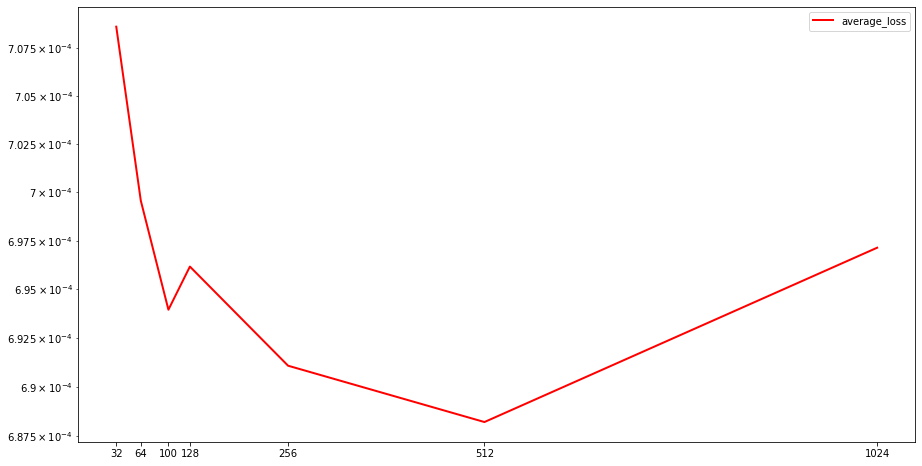

In [83]:
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.semilogy(hidden_sizes, hidden_size_losses, label='average_loss', linewidth=2, c='r')
plt.xticks(hidden_sizes)
plt.legend()
plt.show()

In [84]:
optimal_hidden_size = 512

In [92]:
print("learning_rate training started")
input_size = 5000
output_size = 2

learning_rate_losses = []
for l_rate in learning_rates:
    rnn = RNN(input_size, optimal_hidden_size, output_size)
    train_charRNN(rnn, 15000, l_rate, learning_rate_losses)

print("learning_rate_losses:")
print(learning_rate_losses)

learning_rate training started
[0 0 0 ... 0 0 0]
5000
i: 1664 tensor([0., 0., 1., 0.])
i: 2543 tensor([0., 0., 1., 0.])
i: 3854 tensor([0., 0., 1., 0.])
i: 4695 tensor([0., 0., 1., 0.])
tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
x_line_length: 4
second loop!!!!!!
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
4
actual dimension!!!!
tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])
torch.Size([4, 1, 5000])
4
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type RNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LogSoftmax. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


[0 0 0 ... 0 0 0]
5000
i: 332 tensor([0., 0., 1., 0.])
i: 1259 tensor([0., 0., 1., 0.])
i: 1756 tensor([0., 0., 1., 0.])
i: 2153 tensor([0., 0., 1., 0.])
i: 3193 tensor([0., 0., 1., 0.])
i: 4126 tensor([0., 0., 1., 0.])
i: 4474 tensor([0., 0., 1., 0.])
i: 4708 tensor([0., 0., 1., 0.])
tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
x_line_length: 8
second loop!!!!!!
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
8
actual dimension!!!!
tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])
torch.Size([8, 1, 5000])
8
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
t

C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type RNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LogSoftmax. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


[0 0 0 ... 0 0 0]
5000
i: 143 tensor([0., 0., 1., 0.])
i: 401 tensor([0., 0., 1., 0.])
i: 626 tensor([0., 0., 1., 0.])
i: 1397 tensor([0., 0., 1., 0.])
i: 1618 tensor([0., 0., 1., 0.])
i: 2250 tensor([0., 0., 1., 0.])
i: 2786 tensor([0., 0., 1., 0.])
i: 2835 tensor([0., 0., 1., 0.])
i: 3969 tensor([0., 0., 1., 0.])
i: 4089 tensor([0., 0., 1., 0.])
i: 4268 tensor([0., 0., 1., 0.])
i: 4452 tensor([0., 0., 1., 0.])
i: 4981 tensor([0., 0., 1., 0.])
tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
x_line_length: 13
second loop!!!!!!
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
13
actual dimension!!!!
tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0.

C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type RNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LogSoftmax. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


learning_rate_losses:
[0.0007024210691452026, 0.0006962643265724182, 0.0006986097097396851]


[0.001, 0.005, 0.01]
[0.0007024210691452026, 0.0006962643265724182, 0.0006986097097396851]


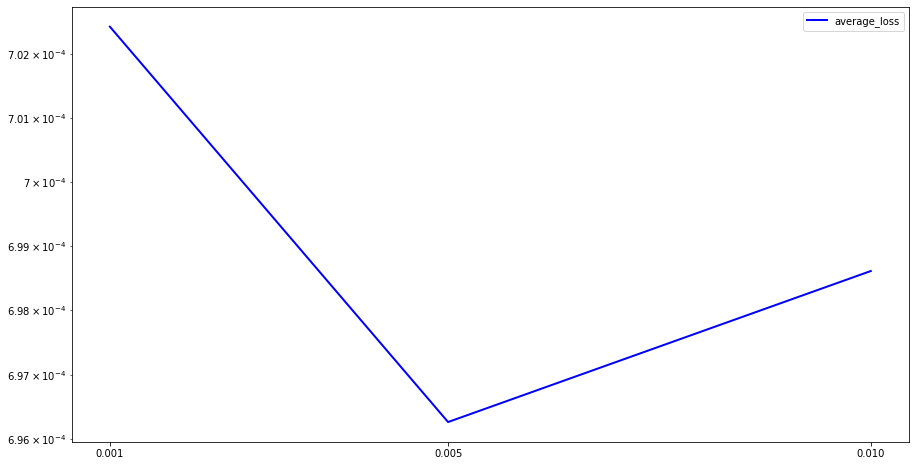

In [93]:
print(learning_rates)
print(learning_rate_losses)
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.semilogy(learning_rates, learning_rate_losses, label='average_loss', linewidth=2, c='b')
plt.xticks(learning_rates)
plt.legend()
plt.show()

In [94]:
optimal_learning_rate = 0.005

In [96]:
print("n_iters training started")
input_size = 5000
output_size = 2
print("optimal_hidden_size:",optimal_hidden_size)

n_iters_losses = []
#optimal_hidden_size = 0
for n_iter in n_iters:
    rnn = RNN(input_size, optimal_hidden_size, output_size)
    train_charRNN(rnn, n_iter, optimal_learning_rate, n_iters_losses)
    
print("n_iters:",n_iters)
print("n_iters_losses:",n_iters_losses)

n_iters training started
optimal_hidden_size: 512
[0 0 0 ... 0 0 0]
5000
i: 1133 tensor([0., 0., 1., 0.])
i: 2953 tensor([0., 0., 1., 0.])
i: 4408 tensor([0., 0., 1., 0.])
i: 4723 tensor([0., 0., 1., 0.])
i: 4768 tensor([0., 0., 1., 0.])
i: 4939 tensor([0., 0., 1., 0.])
tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
x_line_length: 6
second loop!!!!!!
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
6
actual dimension!!!!
tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])
torch.Size([6, 1, 5000])
6
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.

C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type RNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LogSoftmax. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


[0 0 0 ... 0 0 0]
5000
i: 400 tensor([0., 0., 1., 0.])
i: 1502 tensor([0., 0., 1., 0.])
i: 1808 tensor([0., 0., 1., 0.])
i: 2250 tensor([0., 0., 1., 0.])
i: 3532 tensor([0., 0., 1., 0.])
tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
x_line_length: 5
second loop!!!!!!
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
5
actual dimension!!!!
tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])
torch.Size([5, 1, 5000])
5
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type RNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LogSoftmax. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


[0 0 0 ... 0 0 0]
5000
i: 178 tensor([0., 0., 1., 0.])
i: 251 tensor([0., 0., 1., 0.])
i: 559 tensor([0., 0., 1., 0.])
i: 2585 tensor([0., 0., 1., 0.])
i: 3490 tensor([0., 0., 1., 0.])
tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
x_line_length: 5
second loop!!!!!!
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
5
actual dimension!!!!
tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])
torch.Size([5, 1, 5000])
5
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type RNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LogSoftmax. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


[0 0 0 ... 0 0 0]
5000
i: 1627 tensor([0., 0., 1., 0.])
i: 2585 tensor([0., 0., 1., 0.])
i: 3212 tensor([0., 0., 1., 0.])
i: 4113 tensor([0., 0., 1., 0.])
i: 4474 tensor([0., 0., 1., 0.])
tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
x_line_length: 5
second loop!!!!!!
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
5
actual dimension!!!!
tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])
torch.Size([5, 1, 5000])
5
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type RNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LogSoftmax. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


[0 0 0 ... 0 0 0]
5000
i: 1585 tensor([0., 0., 1., 0.])
i: 1798 tensor([0., 0., 1., 0.])
i: 2041 tensor([0., 0., 1., 0.])
i: 3054 tensor([0., 0., 1., 0.])
i: 4123 tensor([0., 0., 1., 0.])
tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
x_line_length: 5
second loop!!!!!!
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
5
actual dimension!!!!
tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])
torch.Size([5, 1, 5000])
5
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type RNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LogSoftmax. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


[0 0 0 ... 0 0 0]
5000
i: 660 tensor([0., 0., 1., 0.])
i: 1453 tensor([0., 0., 1., 0.])
i: 1930 tensor([0., 0., 1., 0.])
i: 2425 tensor([0., 0., 1., 0.])
i: 2543 tensor([0., 0., 1., 0.])
i: 3053 tensor([0., 0., 1., 0.])
i: 3061 tensor([0., 0., 1., 0.])
i: 3164 tensor([0., 0., 1., 0.])
tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
x_line_length: 8
second loop!!!!!!
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
8
actual dimension!!!!
tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])
torch.Size([8, 1, 5000])
8
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
t

C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type RNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LogSoftmax. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


[0 0 0 ... 0 0 0]
5000
i: 1904 tensor([0., 0., 1., 0.])
i: 2031 tensor([0., 0., 1., 0.])
i: 2156 tensor([0., 0., 1., 0.])
i: 3061 tensor([0., 0., 1., 0.])
tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
x_line_length: 4
second loop!!!!!!
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
4
actual dimension!!!!
tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])
torch.Size([4, 1, 5000])
4
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type RNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LogSoftmax. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


n_iters: [5000, 10000, 15000, 20000, 30000, 50000, 100000]
n_iters_losses: [0.0006898716688156128, 0.0006939754486083985, 0.0006925002336502076, 0.0006952380537986755, 0.000694932997226715, 0.0006778916120529175, 0.0007106996774673462]


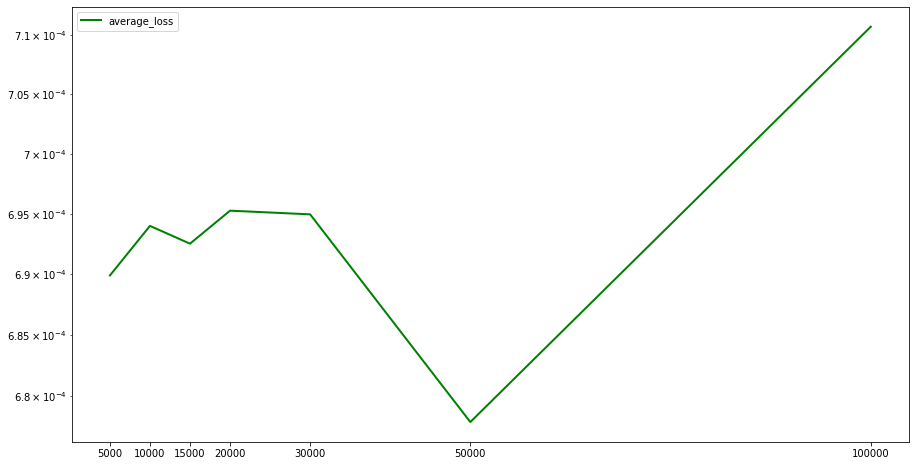

In [98]:
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.semilogy(n_iters, n_iters_losses, label='average_loss', linewidth=2, c='g')
plt.xticks(n_iters)
plt.legend()
plt.show()

In [99]:
optimal_n_iter = 50000

In [101]:
optimal_rnn = RNN(input_size, optimal_hidden_size, output_size)
losses = []
train_charRNN(optimal_rnn, optimal_n_iter, optimal_learning_rate, losses)
optimal_average_loss = losses[0]
print("losses:",losses)
print("optimal_average_loss:",optimal_average_loss)

[0 0 0 ... 0 0 0]
5000
i: 500 tensor([0., 0., 1., 0.])
i: 610 tensor([0., 0., 1., 0.])
i: 1585 tensor([0., 0., 1., 0.])
i: 2501 tensor([0., 0., 1., 0.])
i: 2517 tensor([0., 0., 1., 0.])
i: 3286 tensor([0., 0., 1., 0.])
i: 3750 tensor([0., 0., 1., 0.])
tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
x_line_length: 7
second loop!!!!!!
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0.])
7
actual dimension!!!!
tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])
torch.Size([7, 1, 5000])
7
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([1, 512])
HERE!!!!
torch.Size([1, 5000])
torch.Size([

C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type RNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LogSoftmax. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


losses: [0.000674791932106018]
optimal_average_loss: 0.000674791932106018
